<a href="https://colab.research.google.com/github/horasan/ml/blob/main/ceb_2_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://www.youtube.com/watch?v=Wqmtf9SA_kk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
# read data from google drive
drive.mount('/content/drive')
DRIVE_DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/datasets/"

Mounted at /content/drive


In [3]:
#housing.csv
data = pd.read_csv(DRIVE_DATASET_PATH +"housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


* we can see the data description here
https://www.youtube.com/watch?v=Wqmtf9SA_kk

!!! Burai yanlis. kaggle link' i olmasi laizm"""

* label (target value, true value) is median_house_value

In [4]:
# ocean_proximity is text we cannot use directly. We need to preprocess(feature engineering) this values.


In [5]:
# lets see the simple data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# 4   total_bedrooms      20433 non-null  float64
# total_bedrooms has some missing data. We can process but here for simplicity,
# I will just drop the rows with null values (since # is small)
data.dropna(inplace = True)

In [7]:
# rows with null values are dropped.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


lets do some analysis on the data.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

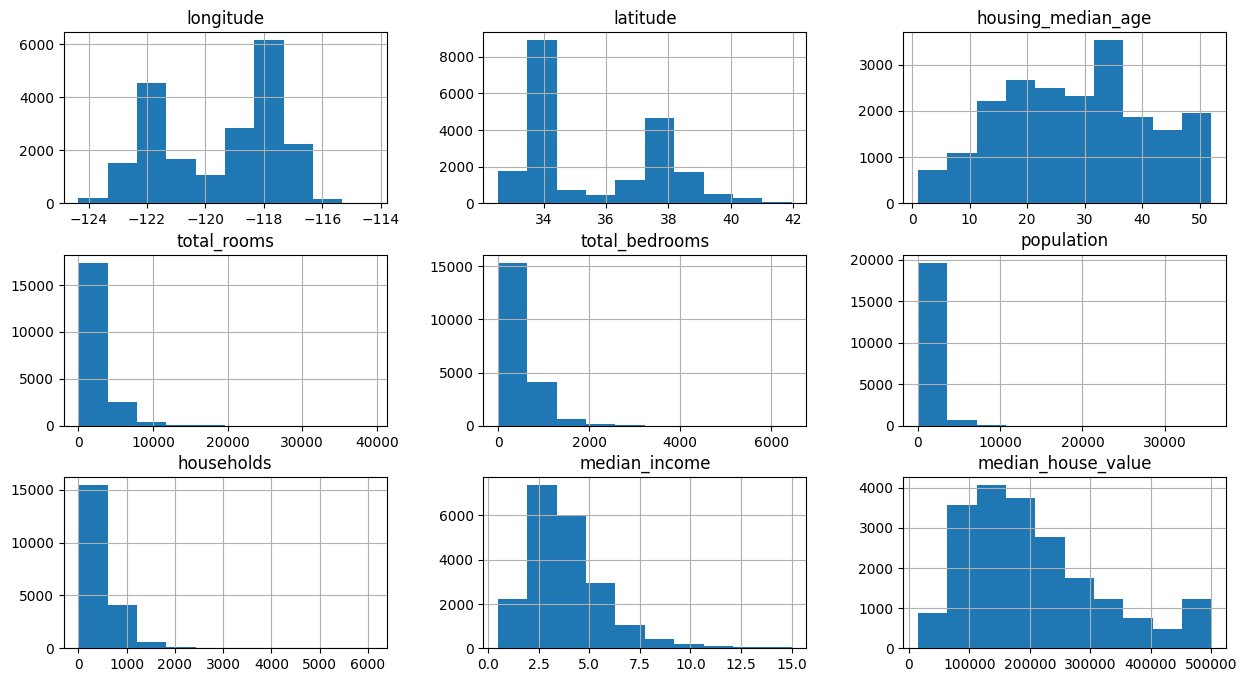

In [8]:
# histogram gives a powerful visualization
data.hist(figsize=(15,8))
# households, median_income and households are left sided, not bell curved!


correlation and heatmap are other powerfull visualization tools (corr, heatmap are missing)

In [9]:
#data.corr()


In [10]:
# households, total_rooms, total_bedrooms and population are left sided, not bell curved!
# so log might help on this one.

In [11]:
data["total_rooms"] = np.log(data["total_rooms"] + 1) # +1 for 0 values
data["total_bedrooms"] = np.log(data["total_bedrooms"] + 1) # +1 for 0 values
data["population"] = np.log(data["population"] + 1) # +1 for 0 values
data["households"] = np.log(data["households"] + 1) # +1 for 0 values

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

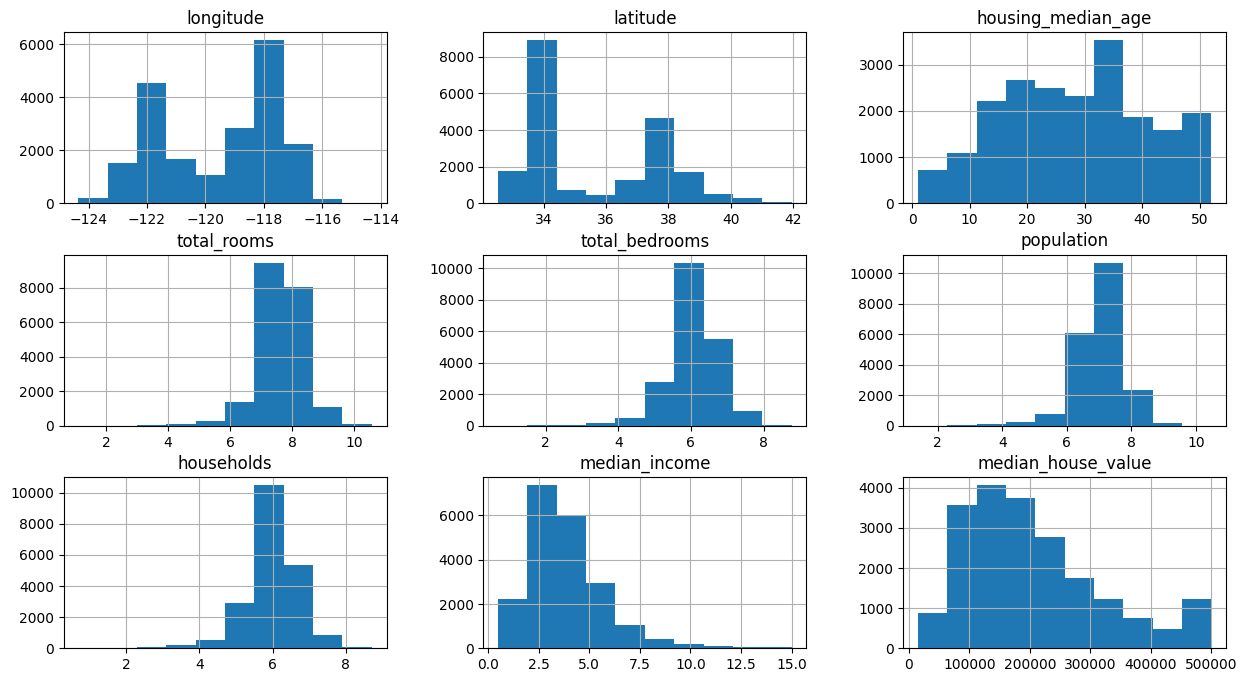

In [12]:
# once again we will use histogram
data.hist(figsize=(15,8))

# about ocean_proximity

1) This columns does not have number values so we need to provide some kind of numbers which represent the ocean_proximity values.

2) But we cannot replace the categories with a number.
Lets say, we cannot replace like
*   NEAR OCEAN --> 1
*   INLAND --> 2

3) We will use the technique called one-hot encoding!

NOTE: sklearn has also one-hot encoding feature but i will use panda version.

In [13]:
# about ocean_proximity
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [14]:
# each value is converted to a column for each row
# then these new columns can be used in our model (after joining to the "data").
pd.get_dummies(data["ocean_proximity"])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [15]:
data = data.join(pd.get_dummies(data["ocean_proximity"]))

In [16]:
# then now we can drop the "ocean_proximity" column
data.drop(["ocean_proximity"], axis = 1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,False,True,False,False,False


In [17]:
data = data.drop(["ocean_proximity"], axis = 1)
# if we run the same code again we get the "['ocean_proximity'] not found in axis" error

In [18]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,False,True,False,False,False


# lets see the correlation about the values
Burada bu heatmap' de neler anlatildigina, bunun nasil okunacagini biraz anlatmak gerekiyor.

<Axes: >

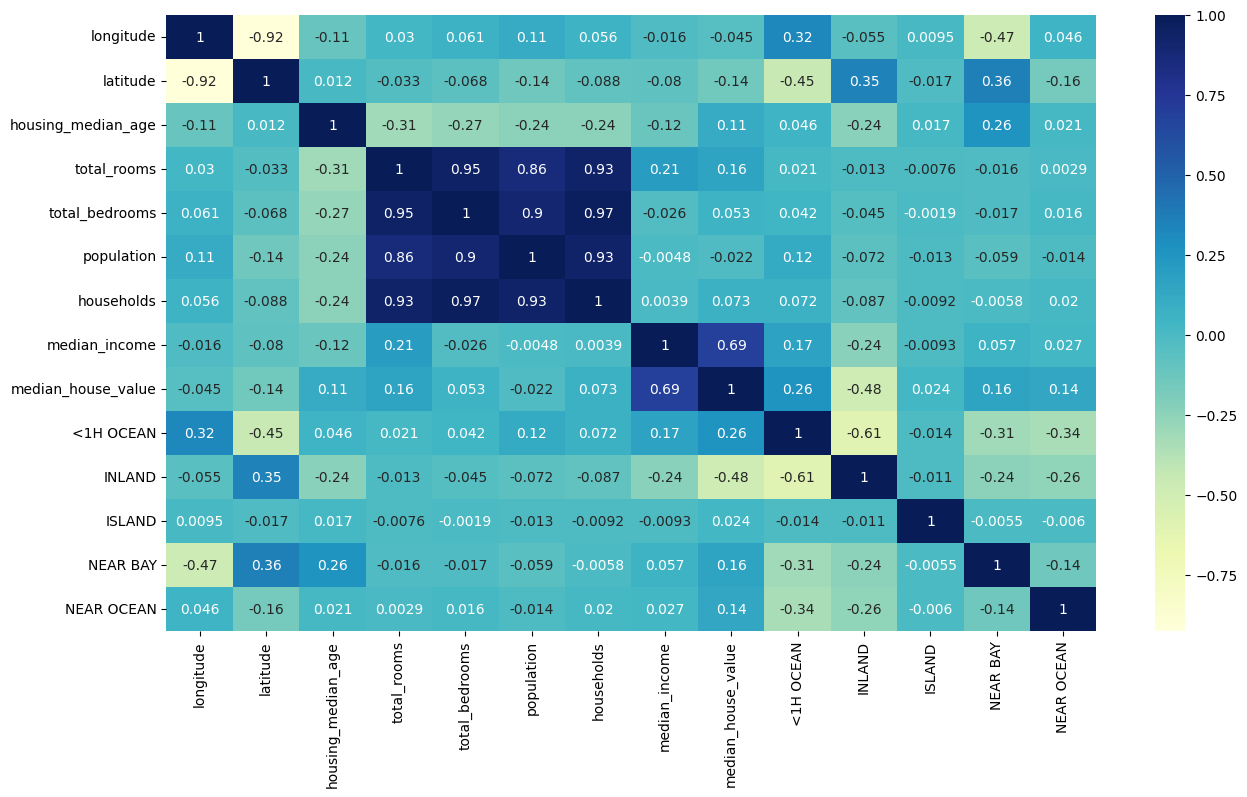

In [19]:
# lets see the correlation about the values
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


# some feature engineering

see the coordinates.
 https://www.mapsofworld.com/usa/states/california/lat-long.html


<Axes: xlabel='longitude', ylabel='latitude'>

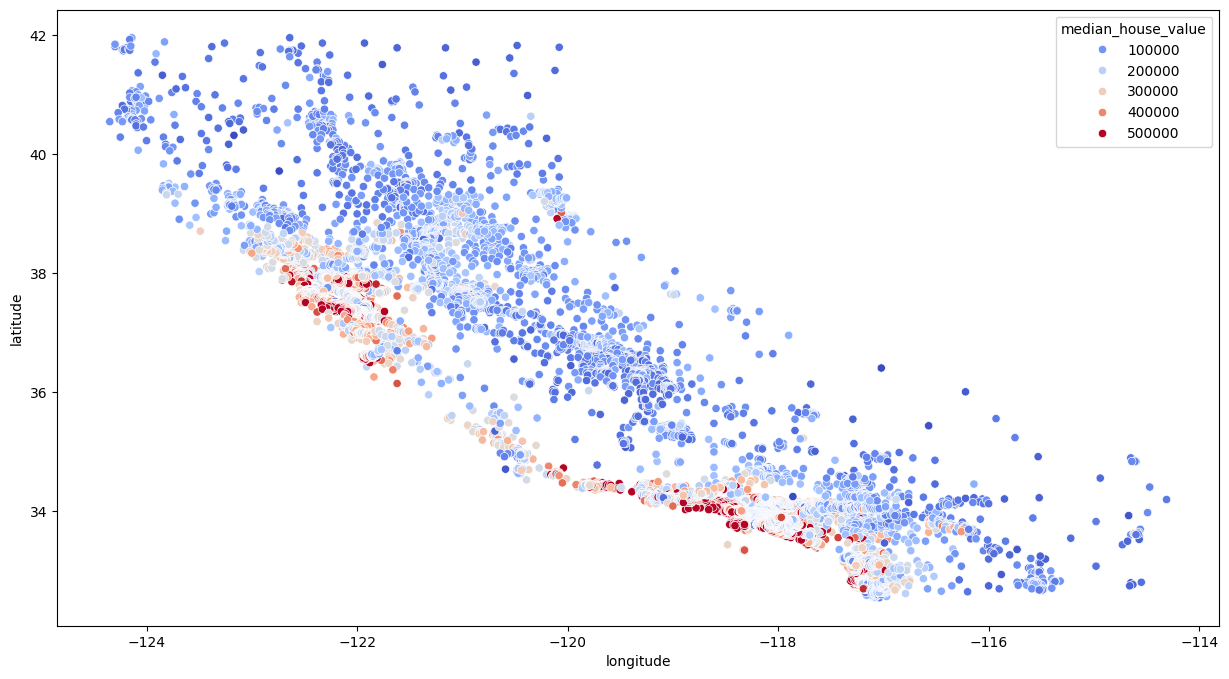

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="longitude", y ="latitude", data= data, hue="median_house_value", palette="coolwarm")
# price: closer the coast, higher the price

we can combine/generate more data!

bedroom_ratio

household_rooms

In [21]:
data["bedroom_ratio"] = data["total_bedrooms"] / data["total_rooms"]

In [22]:
data["household_rooms"] = data["total_rooms"] / data["households"]

<Axes: >

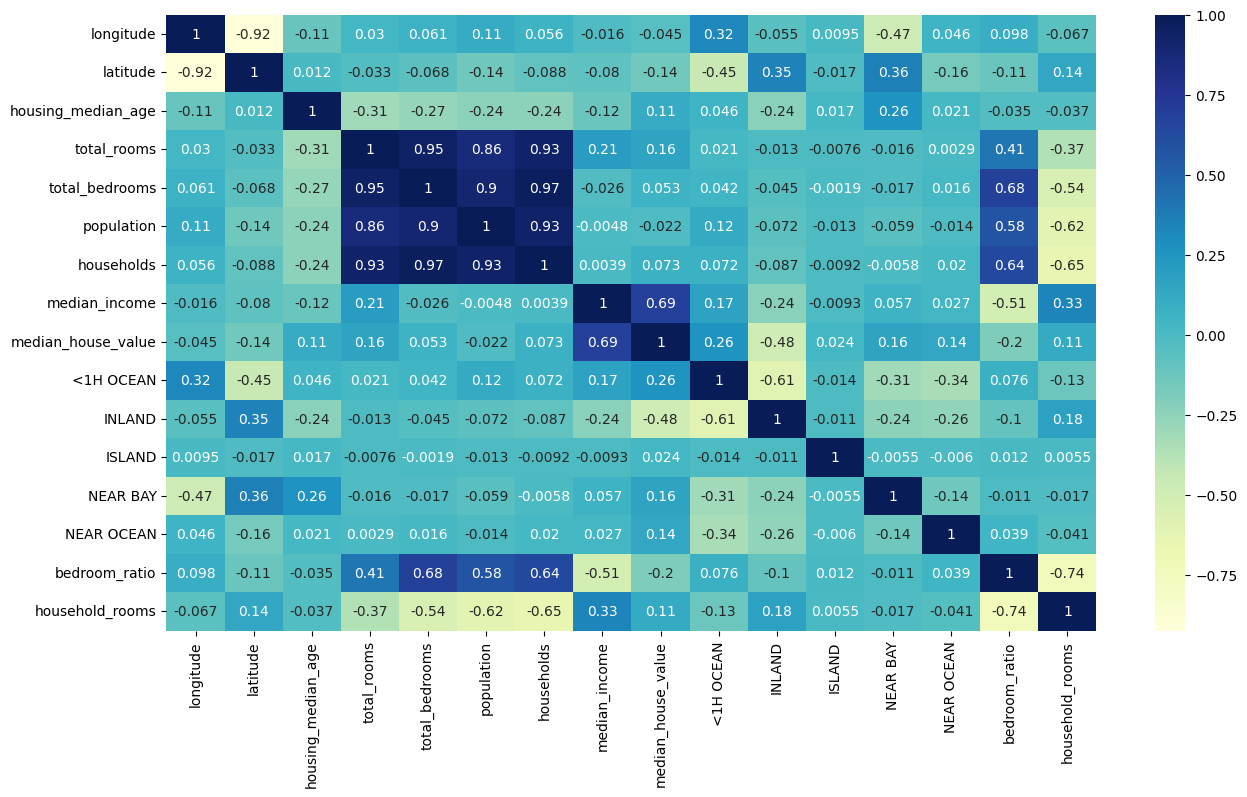

In [23]:
# lets check if the new data(columns) makes sense using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

# Developing ML models

1) First thing to do is preparing train and test data.
!! Burada daha fazla aciklama yapmak lazim. Train data, test data nedir????

2) Random Forest Regression


In [24]:
# 1) Prepare model training data and testing data
from sklearn.model_selection import train_test_split

# X has the features (but not the target label)
X = data.drop(["median_house_value"], axis=1)


In [25]:
y = data["median_house_value"]

In [26]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [28]:
# 2) Random Forest Regression Regression
print("TODO: Random Forest Regression  is missing")

TODO: Random Forest Regression  is missing


# 2) Random Forest Regression Model Performance

TODO: Bu modelin performansi nasil olculur bunu anlat!


In [29]:
# since model is trained, lets see how well the model performs against the test data (this was seperated before)

print("TODO: Random Forest Regression Performance is missing")


TODO: Random Forest Regression Performance is missing
